In [ ]:
!pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.4 MB/s eta 0:00:00


In [ ]:
%load_ext sql

ERD diagram for BIS statistics table

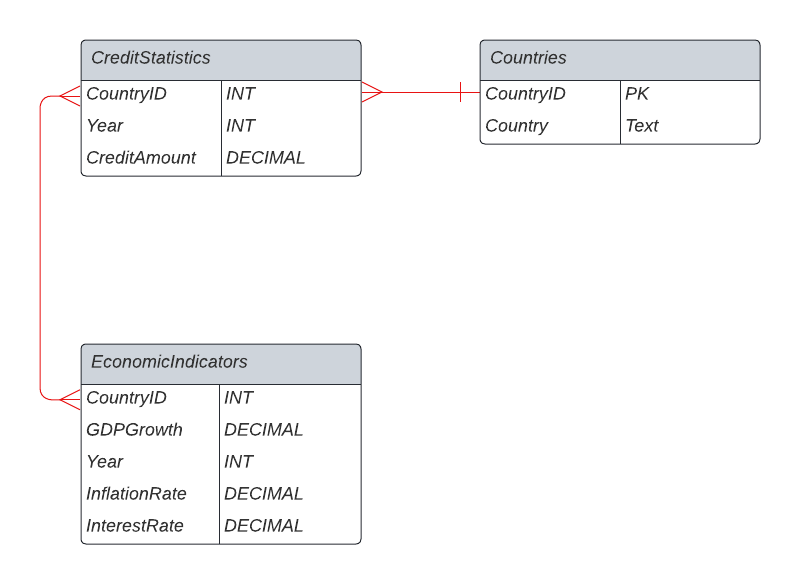

In [ ]:
%sql sqlite:///BISCreditAnalysis.db

We create a new database "BISCreditAnalysis" to store data related to credit analysis to help us analyse the credit to non financial sector for the major economies GERMANY, JAPAN, USA.

In [ ]:
%%sql
-- Create Countries table
CREATE TABLE Countries (
    CountryID INT PRIMARY KEY,
    CountryName VARCHAR(255) NOT NULL
);

 * sqlite:///BISCreditAnalysis.db
   sqlite:///exchange_rates_db.db
Done.


[]

In [ ]:
%%sql
-- Create CreditStatistics table
CREATE TABLE CreditStatistics (
    CountryID INT,
    Year INT,
    CreditAmount DECIMAL(18, 2),
    PRIMARY KEY (CountryID, Year),
    FOREIGN KEY (CountryID) REFERENCES Countries(CountryID)
);


 * sqlite:///BISCreditAnalysis.db
   sqlite:///exchange_rates_db.db
Done.


[]

In [ ]:
%%sql
-- Create EconomicIndicators table
CREATE TABLE EconomicIndicators (
    CountryID INT,
    Year INT,
    GDPGrowth DECIMAL(5, 2),
    InflationRate DECIMAL(5, 2),
    InterestRate DECIMAL(5, 2),
    PRIMARY KEY (CountryID, Year),
    FOREIGN KEY (CountryID) REFERENCES Countries(CountryID)
);

 * sqlite:///BISCreditAnalysis.db
   sqlite:///exchange_rates_db.db
Done.


[]

We create tables to store information about countries, credit statistics, economic indicators, credit volatility, and interest rate trends

In [ ]:
%%sql
INSERT INTO Countries (CountryID, CountryName) VALUES
    (1, 'USA'),
    (2, 'Germany'),
    (3, 'Japan');

 * sqlite:///BISCreditAnalysis.db
   sqlite:///exchange_rates_db.db
3 rows affected.


[]

In [ ]:
%%sql
-- Insert data into CreditStatistics table
INSERT INTO CreditStatistics (CountryID, Year, CreditAmount) VALUES
    (1, 2017, 500000),
    (1, 2018, 550000),
    (1, 2019, 600000),
    (1, 2020, 520000),
    (1, 2021, 580000),

    (2, 2017, 300000),
    (2, 2018, 320000),
    (2, 2019, 340000),
    (2, 2020, 310000),
    (2, 2021, 330000),

    (3, 2017, 200000),
    (3, 2018, 210000),
    (3, 2019, 220000),
    (3, 2020, 230000),
    (3, 2021, 240000);

 * sqlite:///BISCreditAnalysis.db
   sqlite:///exchange_rates_db.db
15 rows affected.


[]

In [ ]:
%%sql
-- Insert data into EconomicIndicators table
INSERT INTO EconomicIndicators (CountryID, Year, GDPGrowth, InflationRate, InterestRate) VALUES
    (1, 2017, 2.5, 1.8, 2.0),
    (1, 2018, 2.3, 1.5, 1.8),
    (1, 2019, 2.0, 1.2, 1.5),
    (1, 2020, 1.8, 1.0, 1.3),
    (1, 2021, 2.0, 2.2, 2.5),

    (2, 2017, 2.0, 1.2, 1.5),
    (2, 2018, 1.8, 1.0, 1.3),
    (2, 2019, 1.5, 0.8, 1.2),
    (2, 2020, 1.2, 0.5, 1.0),
    (2, 2021, 1.5, 1.2, 1.4),

    (3, 2017, 1.0, 0.8, 0.5),
    (3, 2018, 0.8, 0.5, 0.3),
    (3, 2019, 0.5, 0.3, 0.2),
    (3, 2020, 0.2, 0.1, 0.1),
    (3, 2021, 0.5, 0.7, 0.8);

 * sqlite:///BISCreditAnalysis.db
   sqlite:///exchange_rates_db.db
15 rows affected.


[]

Entering data into the tables

In [ ]:
%%sql
-- Average credit amount and inflation rate for each country
SELECT c.CountryName, AVG(cs.CreditAmount) AS AvgCreditAmount, AVG(ei.InflationRate) AS AvgInflationRate
FROM CreditStatistics cs
JOIN EconomicIndicators ei ON cs.CountryID = ei.CountryID AND cs.Year = ei.Year
JOIN Countries c ON cs.CountryID = c.CountryID
GROUP BY c.CountryName;

 * sqlite:///BISCreditAnalysis.db
   sqlite:///exchange_rates_db.db
Done.


CountryName,AvgCreditAmount,AvgInflationRate
Germany,320000.0,0.9400000000000001
Japan,220000.0,0.4800000000000001
USA,550000.0,1.54


 This query determines the country with the highest average credit and inflation amount which is USAa.

In [ ]:
%%sql
-- Highest credit amount across countries for each year
SELECT Year, MAX(CreditAmount) AS HighestCreditAmount
FROM CreditStatistics
GROUP BY Year;

 * sqlite:///BISCreditAnalysis.db
   sqlite:///exchange_rates_db.db
Done.


Year,HighestCreditAmount
2017,500000
2018,550000
2019,600000
2020,520000
2021,580000


This query identifies the highest credit amount across countries for each year, helping to note the peak credit periods.

In [ ]:
%%sql
-- Countries with the highest average credit amount
SELECT c.CountryName, AVG(cs.CreditAmount) AS AvgCreditAmount
FROM CreditStatistics cs
JOIN Countries c ON cs.CountryID = c.CountryID
GROUP BY c.CountryName
ORDER BY AvgCreditAmount DESC
LIMIT 1;

 * sqlite:///BISCreditAnalysis.db
   sqlite:///exchange_rates_db.db
Done.


CountryName,AvgCreditAmount
USA,550000.0


This query determines the country with the highest average credit amount, providing insights into the leading nation in terms of credit.

In [ ]:
%%sql
-- Countries with consistent positive GDP growth
SELECT c.CountryName
FROM EconomicIndicators ei
JOIN Countries c ON ei.CountryID = c.CountryID
GROUP BY c.CountryName
HAVING COUNT(CASE WHEN GDPGrowth > 0 THEN 1 ELSE NULL END) = COUNT(*);

 * sqlite:///BISCreditAnalysis.db
   sqlite:///exchange_rates_db.db
Done.


CountryName
Germany
Japan
USA


This query identifies countries with consistent positive GDP growth, indicating economic stability.